# Simulations for __All of Statistics__

The book [All of Statistics](http://link.springer.com/book/10.1007%2F978-0-387-21736-9) by Larry Wasserman has lots of great problems, but mostly without solutions.  Here I'm going to use simulated data to verify answers to a few interesting problems from that book. 

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

## Chapter 6
### Exercise 2

With $X_i \sim Uniform(0, \theta)$, with $i \in [1, n]$, compute the bias, standard error, and mean squared error of the estimator $\hat{\theta} = \max(\{X_i\})$.

#### Analytic results
\begin{align}
\text{bias}[\hat{\theta}] &= -\frac{\theta}{n+1}, \\
\text{Var}[\hat{\theta}] &= \frac{n\theta^2}{(n+1)^2 (n+2)}, \\
\text{MSE}[\hat{\theta}] &= \frac{(2n+2)\theta^2}{(n+1)^2 (n+2)},
\end{align}

and the standard error is just the square root of the variance in $\hat{\theta}$.

#### Simulated results
Here I'm simulating 100 experiments with 1000 samples drawn from a $Uniform(0, 1)$ distribution and then averaging over each experiment to obtain sample estimates for the bias, standard error, and MSE.  

In [25]:
true_theta = 1.
n = 1000  # samples per experiment
b = 100  # number of experiments
data = stats.uniform.rvs(0, true_theta, size=(b, n))

sample_bias = np.mean(np.max(data, axis=1) - true_theta * np.ones(b))
calculated_bias = -1./(n + 1)
print('Sample bias: ' + str(round(sample_bias, 3)))
print('Calculated bias: ' + str(round(calculated_bias, 3)))

sample_var = np.var(np.max(data, axis=1))
calculated_var = n/((n+1)**2 * (n+2))
print('Sample std. error: ' + str(round(np.sqrt(sample_var), 3)))
print('Calculated std. error: ' + str(round(np.sqrt(calculated_var), 3)))

Sample bias: -0.001
Calculated bias: -0.001
Sample std. error: 0.001
Calculated std. error: 0.001


The MSE will also be approximately the same between the sample and analytical results since MSE is just equal to the bias squared plus the standard error squared.

#### Alternate Method: the Bootstrap

In a real-world scenario it is unlikely we would be able to recreate the same experiment 100 times, and so the method above is mostly useful for theoretical applications (but not much else).  Here I use the Bootstrap on only a single experiment to achieve roughly the same thing (although still with the non-real-world scenario where we know the true value of $\theta$):

In [52]:
data = stats.uniform.rvs(0, true_theta, 1000)
bootstrap_data = np.random.choice(data, (b, n), replace=True)

Now `bootstrap_data` has an analogous role to `data` in the first method, and I can just do the same steps as above:

In [53]:
bootstrap_bias = np.mean(np.max(bootstrap_data, axis=1) - true_theta)
print("Bootstrap bias: " + str(round(bootstrap_bias, 3)))

Bootstrap bias: -0.001


In [54]:
bootstrap_var = np.var(np.max(bootstrap_data, axis=1))
print("Bootstrap std. error: " + str(round(np.sqrt(bootstrap_var), 3)))

Bootstrap std. error: 0.001


The results are close even though the variant using the Bootstrap has only 1% of the data where all 100 experiments were simulated.

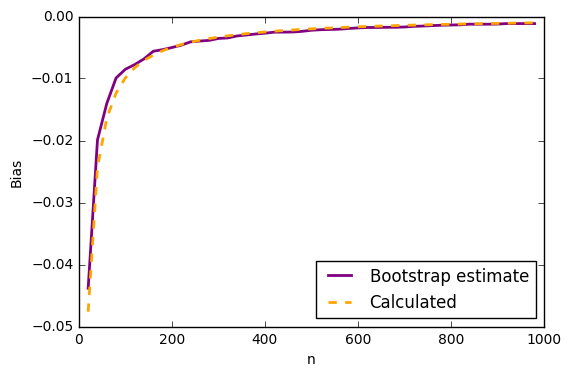

In [61]:
rolling_bias = [(i, np.mean(np.max(bootstrap_data[:, 0:i], axis=1)) - true_theta) 
                for i in range(1, bootstrap_data.shape[1]) if i % 20 == 0]
calculated_rolling_bias = [(j, -1/(j + 1)) for j in range(1, bootstrap_data.shape[1]) if j % 20 == 0]
plt.figure()
plt.plot(*zip(*rolling_bias), linewidth=2.0, color='purple', label='Bootstrap estimate')
plt.plot(*zip(*calculated_rolling_bias), linewidth=2.0, color='orange', linestyle='--', label='Calculated')
plt.xlabel('n')
plt.ylabel('Bias')
plt.legend(loc=4)
plt.show()

In [ ]:
rolling_se = [(i, np.std(np.max(bootstrap_data[:, 0:i], axis=1))) 
              for i in range(1, bootstrap_data.shape[1]) if i % 20 == 0] 
calculated_rolling_se = [(j, np)]